<a href="https://colab.research.google.com/github/Charan6924/MachineLearningProjects/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris(as_frame = True)
X_iris = iris.data[['petal length (cm)','petal width (cm)']].values
y_iris = iris.target

In [10]:
tree = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree.fit(X_iris,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree,
    out_file = 'iris_tree.dot',
    feature_names=['petal length (cm)','petal width (cm)'],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

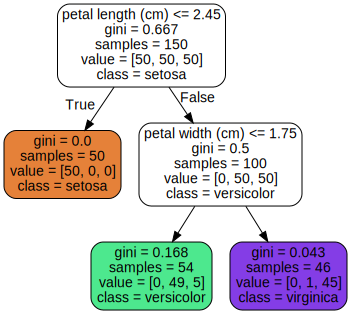

In [12]:
from graphviz import Source
Source.from_file('iris_tree.dot')

In [13]:
tree.predict_proba([[5,1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [14]:
tree.predict([[5,1.5]])

array([1])

In [16]:
from sklearn.datasets import make_moons
X_moons,y_moons = make_moons(n_samples = 150,noise = 0.2,random_state = 42)

tree_clf1 = DecisionTreeClassifier(random_state = 42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 5,random_state = 42)
tree_clf1.fit(X_moons,y_moons)
tree_clf2.fit(X_moons,y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [19]:
X_moons_test,y_moons_test = make_moons(n_samples = 1000,noise = 0.2,random_state = 42)


tree_clf2.score(X_moons_test,y_moons_test)

0.918

In [18]:
tree_clf1.score(X_moons_test,y_moons_test)

0.901

Regression Using a decision tree

In [20]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200,1)-0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200,1)

In [22]:
tree_reg = DecisionTreeRegressor(max_depth = 2,random_state = 42)
tree_reg.fit(X_quad,y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

Adding principal component analysis transformation

In [23]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(),PCA())
X_iris_rotated = pipe.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth = 3, random_state = 42)
tree_clf_pca.fit(X_iris_rotated,y_iris)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [24]:
X_moons, y_moons = make_moons(n_samples = 10000,noise = 0.4)

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_moons,y_moons,test_size = 0.2, random_state = 42)

In [34]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [35]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.859